# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook

sinasc_RO = pd.read_csv('b1abb33c4f.csv')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [4]:
sinasc_RO.loc[sinasc_RO['APGAR5']<= 3, 'Apgar_Categoria'] = 'Asfixia_Severa'
sinasc_RO.loc[(sinasc_RO['APGAR5']>= 4) & (sinasc_RO['APGAR5']<= 5), 'Apgar_Categoria'] = 'Asfixia_Moderada'
sinasc_RO.loc[(sinasc_RO['APGAR5']>= 6) & (sinasc_RO['APGAR5']<= 7), 'Apgar_Categoria'] = 'Asfixia_Leve'
sinasc_RO.loc[sinasc_RO['APGAR5']>= 8, 'Apgar_Categoria'] = 'Normal'

sinasc_RO

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,Apgar_Categoria
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Normal
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Normal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Normal
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Normal
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,Normal
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723,Normal
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,Normal
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,Normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

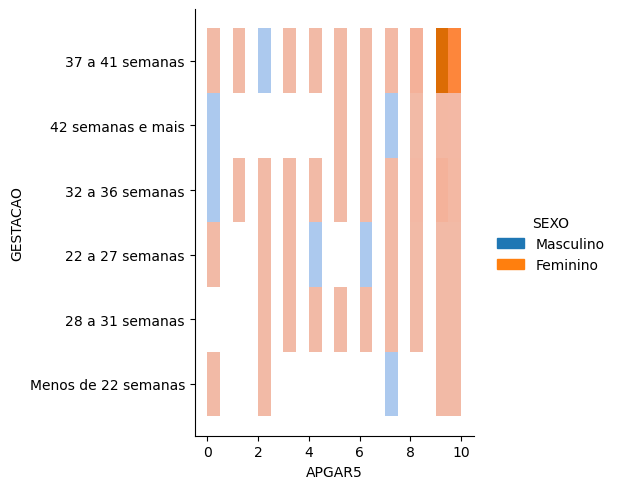

In [20]:
# histograma com covariáveis
sns.displot(data = sinasc_RO
            ,x = 'APGAR5'
            ,y = 'GESTACAO'
            ,hue = 'SEXO'
            ,bins = 20
           )

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [22]:
cross_sinasc=pd.crosstab(sinasc_RO['GESTACAO'], sinasc_RO['APGAR5'])
print(cross_sinasc)

APGAR5               0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
GESTACAO                                                                    
22 a 27 semanas         7     0     8     6     1     0     2    10    24   
28 a 31 semanas         0     0     2     1     5     7     7    11    61   
32 a 36 semanas         2     2     2     2     8    11    17    56   362   
37 a 41 semanas         5    20     3     5     7    21    45   151  1417   
42 semanas e mais       1     0     0     0     0     1     1     5    44   
Menos de 22 semanas     1     0     1     0     0     0     0     1     0   

APGAR5                9.0   10.0  
GESTACAO                          
22 a 27 semanas         19     8  
28 a 31 semanas         55    13  
32 a 36 semanas       1307   465  
37 a 41 semanas      13565  7284  
42 semanas e mais      423   223  
Menos de 22 semanas      3     1  


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [25]:
freq_cross_sinasc= cross_sinasc.div(cross_sinasc.sum(axis = 1), axis = 0)
print(freq_cross_sinasc)

APGAR5                   0.0       1.0       2.0       3.0       4.0   \
GESTACAO                                                                
22 a 27 semanas      0.082353  0.000000  0.094118  0.070588  0.011765   
28 a 31 semanas      0.000000  0.000000  0.012346  0.006173  0.030864   
32 a 36 semanas      0.000895  0.000895  0.000895  0.000895  0.003581   
37 a 41 semanas      0.000222  0.000888  0.000133  0.000222  0.000311   
42 semanas e mais    0.001433  0.000000  0.000000  0.000000  0.000000   
Menos de 22 semanas  0.142857  0.000000  0.142857  0.000000  0.000000   

APGAR5                   5.0       6.0       7.0       8.0       9.0   \
GESTACAO                                                                
22 a 27 semanas      0.000000  0.023529  0.117647  0.282353  0.223529   
28 a 31 semanas      0.043210  0.043210  0.067901  0.376543  0.339506   
32 a 36 semanas      0.004924  0.007610  0.025067  0.162041  0.585049   
37 a 41 semanas      0.000932  0.001998  0.006704 

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='GESTACAO'>

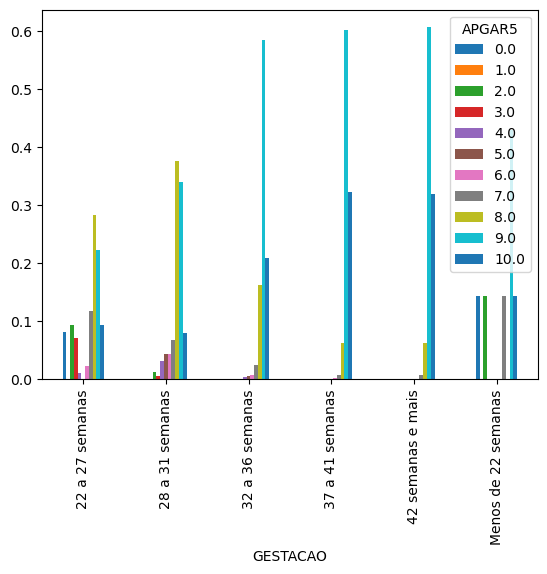

In [34]:
# o gráfico abaixo mostra um quadro maior de asfixia para gravidezes com menos semanas, porém, não é possivel concordar ou
# descordar de tal fato.
freq_cross_sinasc.plot.bar()


#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

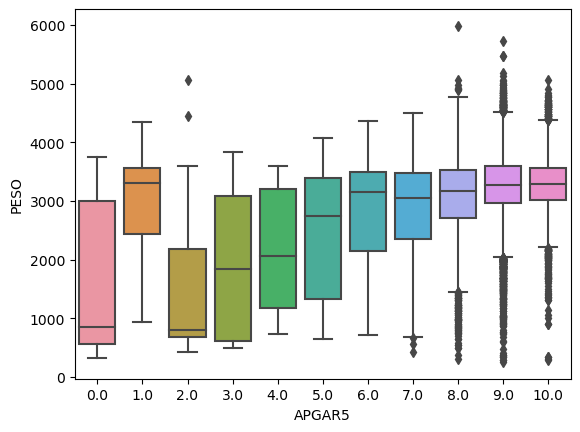

In [31]:
ax = sns.boxplot(x="APGAR5", y="PESO", data=sinasc_RO)

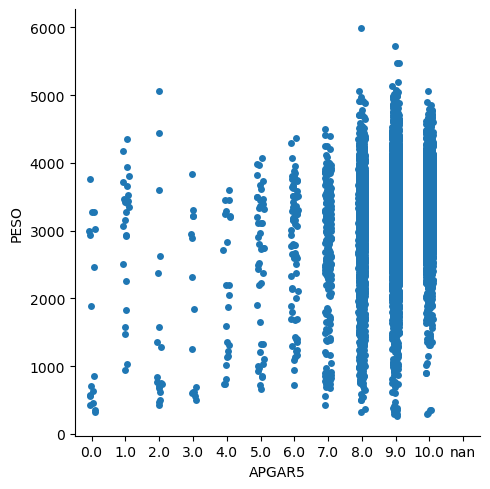

In [35]:
sns.catplot(x='APGAR5', y='PESO'
            , data=sinasc_RO
            , ci = None
           )

<Axes: xlabel='APGAR5', ylabel='PESO'>

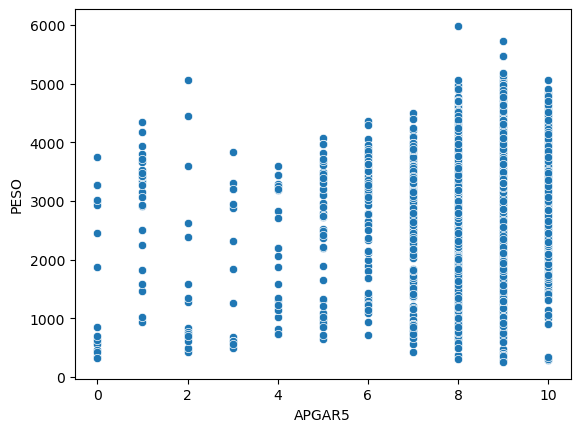

In [36]:
sns.scatterplot(x = 'APGAR5'
                , y = 'PESO'
                , data = sinasc_RO
               )

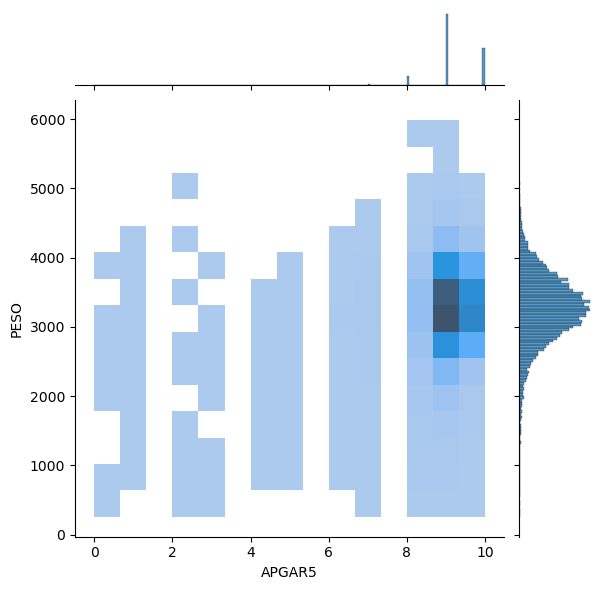

In [37]:
sns.jointplot(x = 'APGAR5'
              , y = 'PESO'
              , data = sinasc_RO
              , kind="hist"
              , bins = [15, 15])